In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This code aims at responding some questions found relevant for the understanding of AirBnB business in Seattle, mainly focused on the prices, availability, vibes and discounts offered. These questions will be useful not just for future hosts that may find them key to take a decision about where to take their vacation, but also for future hosters that want to know a little more about the business and market they are getting into. 

### High-level look at the data

In [5]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
calendar.shape

(1393570, 4)

In [5]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [6]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [98]:
reviews.shape

(84849, 6)

In [100]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [101]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [112]:
listings.shape

(3818, 92)

In [114]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [115]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [116]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### Data preparation 

Here, we will analyze missing and categorical values in order to estimate their impact on the results. 

In [9]:
print(calendar.isnull().sum())
len(calendar)

listing_id         0
date               0
available          0
price         459028
dtype: int64


1393570

In the calendar dataset there are just NaN values in the *price* column. After a look to the data we can determine that this is associated to the listings that are not available, so no deeper data treatment is needed in this case. 

In [10]:
print(reviews.isnull().sum())
len(reviews)

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


84849

In the reviews dataset there are just missing values in the comments columns, and not a considerable number worth studying. This insight means that 18 people did not leave a comment when doing the review so, again, no deeper treatment is needed. 

In [14]:
listings_null = pd.DataFrame(listings.isnull().sum())
listings_null.reset_index(level=0, inplace=True)
listings_null.columns = ['Column', 'Missing Values']

In [17]:
columns_with_nan = []
for i, column in enumerate(listings_null['Column']):
    missing_cnt = listings_null['Missing Values'].iloc[i]
    if missing_cnt != 0:
        columns_with_nan.append(column)

In [20]:
columns_with_nan

['summary',
 'space',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

As we can see, most of the columns with missing values are associated to variables dependent on information related to notes, comments, reviews, etc., usually provided by either hosts or hosters, so it is normal that some of them leave empty data. 

On the other hand, when talking about categorical data, we have mainly focused on those columns that contains numeric information but with some characters that make them strings. In order to treat these values we have created a function (provided below) that eliminates such characters and gives the numeric value as a float. 

From the rest of categorical variables, since are generally information (comments, reviews, notes, etc.) provided by either hosts or hosters, no deeper treatment was possible. 

### Useful functions:

In [ ]:
def eliminate_chars(dataset, column, char1, char2=''):
    '''
    INPUT:
        dataset: the dataset we want to work with 
        column: the column of the dataset we want to eliminate the character from 
        char1: character we want to remove
        char2: character we want to remove. Optional, if no needed leave blank
    OUTPUT: 
        values: new column transformed
        
    This function eliminates string characters from numeric columns so that we can operate with them. 
    For example, in a column representing price it will allow eliminate the dollar symbol. 
    Also, once removed, converts the values to float type. 
    '''
    values = []
    for value in dataset[column]:
        if value == 0 or pd.isnull(value):
            value = value
        else:
            value = value.replace(char1, '')
            value = value.replace(char2, '')
            value = float(value)
        values.append(value)
    return values

After a high level look at the data, three questions were found worth studying, whose response will be the main objective of the project:

**1. Which months are, in general, the most expensive? Is it due to higher prices in the listings or due to higher availability? What about the days of the week?**

**2. Can you describe the vibe of each Seattle neighborhood using listing descriptions?**

**3. Is it better, from an economical point of view, to rent a spare room/house by day, weekly, or monthly?**

In the following sections we will look deeper into the data in order to find useful information needed to respond to the questions. The study has been divided by datasets, begining by the calendar data, then reviews and finally listings. 

The study and response to the questions can be found through the process. 

### Calendar:

In [61]:
calendar['listing_id'].value_counts(dropna=False).head()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
Name: listing_id, dtype: int64

As we can see, there are 365 records for each listing_id in this dataset, which means that the dataset represents the availability and price of each listing for each day within a period of one year (365 days). Let's check the first and last dates so that we can prove that the dataset corresponds to a year:

In [8]:
# Starting date for the data analysed in the calendar dataset
calendar['date'].iloc[0]

'2016-01-04'

In [9]:
# Last date for the data analysed in the calendar dataset
calendar['date'].iloc[len(calendar)-1]

'2017-01-02'

Effectively, the temporal length is a year. 

In [10]:
calendar['available'].value_counts(dropna=False)

t    934542
f    459028
Name: available, dtype: int64

### Question 1: Which months and days of the week are, in general, the most expensive?

In [59]:
# Checking how many days each of the listings is available
calendar[calendar['available'] == 't'].groupby('listing_id').count()[['available']].head()

,available
listing_id,
3335,309
4291,365
5682,309
6606,365
7369,53


In [146]:
#Converting the date column to a datetime
calendar['date'] = pd.to_datetime(calendar['date'])

#Computing the day of week
calendar['dayofweek'] = calendar['date'].dt.day_name()

#Computing the month of the year
calendar['month'] = calendar['date'].dt.month

In [147]:
calendar[calendar['available'] == 't']['month'].value_counts(ascending=False, dropna=False)

12    87061
3     83938
10    82438
11    81780
5     79971
9     77246
6     77244
8     76347
4     76037
7     74222
2     73321
1     64937
Name: month, dtype: int64

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(15,5))
group_availability.groupby(['neighbourhood_group_cleansed', 'dayofweek']).count()[['available']].unstack().plot(ax =ax)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")

In [33]:
calendar[calendar['available'] == 't']['dayofweek'].value_counts(ascending=False, dropna=False)

Monday       135800
Sunday       133615
Tuesday      133407
Wednesday    133375
Thursday     132968
Friday       132803
Saturday     132574
Name: dayofweek, dtype: int64

In [76]:
calendar['price'].value_counts(dropna=False).sort_index(ascending=False).head(10)

1650.0     91
1450.0     28
1250.0     15
1240.0      2
1199.0     71
1099.0    120
1000.0    370
999.0      72
975.0      65
950.0     365
Name: price, dtype: int64

In [148]:
calendar['price'] = eliminate_chars(calendar, 'price', '$', ',')

In [149]:
# Check which month is the most expensive
calendar[calendar['available'] == 't'].groupby(calendar['month']).sum()[['price']].sort_values('price', ascending = False)

,price
month,
12,11949282.0
8,11502179.0
6,11391415.0
10,11296639.0
7,11288732.0
5,11159008.0
11,11096625.0
9,11065949.0
3,10798161.0


In [161]:
calendar[calendar['available'] == 't'].groupby(calendar['month']).mean()[['price']].sort_values('price', ascending = False)

,price
month,
7,152.094150
8,150.656594
6,147.473137
9,143.255949
5,139.538183
12,137.251835
10,137.031939
11,135.688738
4,135.097005


In [165]:
prices_months = calendar[calendar['available'] == 't'].groupby(calendar['month']).sum()[['price']]
prices_months.reset_index(level=0, inplace=True)
prices_months.columns = ['Month', 'Total Price']

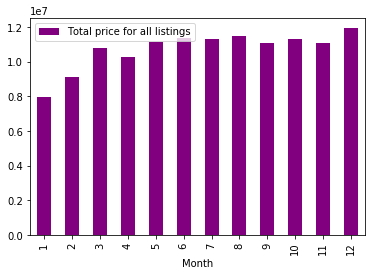

In [166]:
prices_months.plot(kind='bar', x='Month', y='Total Price', color='Purple', label='Total price for all listings')

In [167]:
mean_price = calendar[calendar['available'] == 't'].groupby(calendar['month']).mean()[['price']]
mean_price.reset_index(level=0, inplace=True)
mean_price.columns = ['Month', 'Mean Price']

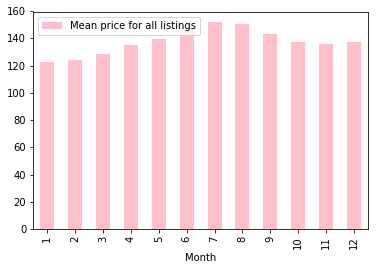

In [169]:
mean_price.plot(kind='bar', x='Month', y='Mean Price', color='Pink', label='Mean price for all listings')

We want to know if the expensiveness of the months is due to a high availability or higher prices, thus we need to check which months do the most outstanding prices belong to. 

In [94]:
# List of the most outstanding prices, by descendent order
expensive = calendar['price'].value_counts(dropna=False).sort_index(ascending=False).head(20).keys().tolist()

# For each of those prices, which month/s they belong to 
for price in expensive: 
    print('The number of times the price ${} appears is:'.format(price))
    print(calendar[calendar['price'] == price].groupby(calendar['month']).count()[['price']].sort_values('price', ascending = False))
    print('\n')

The number of times the price $1650.0 appears is:
       price
month       
12        31
10        30
11        30


The number of times the price $1450.0 appears is:
       price
month       
9         27
10         1


The number of times the price $1250.0 appears is:
       price
month       
8         12
9          3


The number of times the price $1240.0 appears is:
       price
month       
7          2


The number of times the price $1199.0 appears is:
       price
month       
8         31
7         30
9         10


The number of times the price $1099.0 appears is:
       price
month       
3         31
5         31
6         30
4         28


The number of times the price $1000.0 appears is:
       price
month       
12        41
3         31
5         31
7         31
8         31
10        31
4         30
6         30
9         30
11        30
2         29
1         25


The number of times the price $999.0 appears is:
       price
month       
2         26
1         14
12

Now let's do the same with the days of the week: 

In [170]:
# Check which day is the most expensive
calendar[calendar['available'] == 't'].groupby(calendar['dayofweek']).sum()[['price']].sort_values('price', ascending = False)

,price
dayofweek,
Friday,18995649.0
Saturday,18984880.0
Monday,18424857.0
Sunday,18233095.0
Thursday,18146945.0
Wednesday,18065361.0
Tuesday,18064477.0


In [172]:
calendar[calendar['available'] == 't'].groupby(calendar['dayofweek']).mean()[['price']].sort_values('price', 
                                                                                                      ascending = False)

,price
dayofweek,
Saturday,143.202136
Friday,143.036294
Thursday,136.476032
Sunday,136.459941
Monday,135.676414
Wednesday,135.447880
Tuesday,135.408764


In [173]:
prices_days = calendar[calendar['available'] == 't'].groupby(calendar['dayofweek']).sum()[['price']]
prices_days.reset_index(level=0, inplace=True)
prices_days.columns = ['Day', 'Total Price']

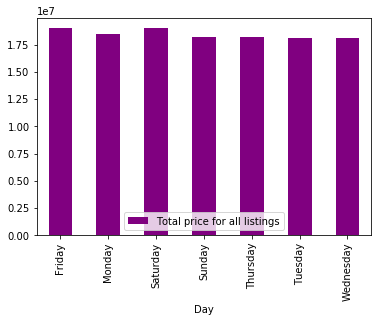

In [174]:
prices_days.plot(kind='bar', x='Day', y='Total Price', color='Purple', label='Total price for all listings')

In [175]:
mean_price = calendar[calendar['available'] == 't'].groupby(calendar['dayofweek']).mean()[['price']]
mean_price.reset_index(level=0, inplace=True)
mean_price.columns = ['Day', 'Mean Price']

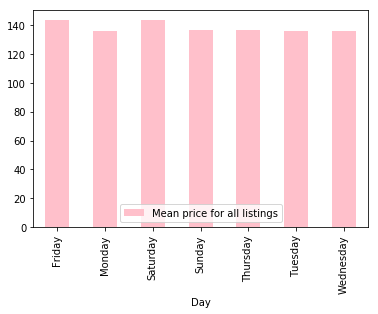

In [176]:
mean_price.plot(kind='bar', x='Day', y='Mean Price', color='Pink', label='Mean price for all listings')

In [96]:
# For each of those prices, which month/s they belong to 
for price in expensive: 
    print('The number of times the price ${} appears is:'.format(price))
    print(calendar[calendar['price'] == price].groupby(calendar['dayofweek']).count()[['price']].sort_values('price', ascending = False))
    print('\n')

The number of times the price $1650.0 appears is:
           price
dayofweek       
Friday        13
Monday        13
Saturday      13
Sunday        13
Thursday      13
Tuesday       13
Wednesday     13


The number of times the price $1450.0 appears is:
           price
dayofweek       
Friday         4
Monday         4
Saturday       4
Sunday         4
Thursday       4
Tuesday        4
Wednesday      4


The number of times the price $1250.0 appears is:
           price
dayofweek       
Saturday       3
Friday         2
Monday         2
Sunday         2
Thursday       2
Tuesday        2
Wednesday      2


The number of times the price $1240.0 appears is:
           price
dayofweek       
Friday         1
Saturday       1


The number of times the price $1199.0 appears is:
           price
dayofweek       
Friday        11
Saturday      11
Monday        10
Thursday      10
Tuesday       10
Wednesday     10
Sunday         9


The number of times the price $1099.0 appears is:
          

### Reviews

In [104]:
reviews['listing_id'].value_counts(dropna=False).head()

208356    474
365550    466
25002     404
47196     353
63308     320
Name: listing_id, dtype: int64

In [105]:
#Converting the date column to a datetime
reviews['date'] = pd.to_datetime(reviews['date'])

#Computing the day of week
reviews['dayofweek'] = reviews['date'].dt.day_name()

#Computing the month of the year
reviews['month'] = reviews['date'].dt.month

In [106]:
reviews['month'].value_counts(ascending=False, dropna=False)

8     13018
9     11677
7     10503
10     8955
6      8544
11     6665
5      5854
12     5732
4      4233
3      4158
1      2867
2      2643
Name: month, dtype: int64

In [107]:
reviews['dayofweek'].value_counts(ascending=False, dropna=False)

Monday       17589
Sunday       14159
Tuesday      13540
Saturday     10582
Friday       10040
Wednesday     9965
Thursday      8974
Name: dayofweek, dtype: int64

### Listings:

In [117]:
for column in listings.columns:
    print('Column: {}'.format(column))
    print(listings[column].value_counts(dropna=False))

Column: id
8849407     1
9362082     1
5364414     1
5062445     1
1084084     1
8065715     1
9922140     1
5042014     1
3422894     1
7381677     1
3254956     1
3121829     1
3959460     1
6179956     1
8608414     1
9202380     1
4711069     1
3050140     1
5402304     1
7598743     1
631445      1
9820818     1
8723086     1
3627658     1
8643209     1
3402376     1
3732103     1
10123910    1
7922373     1
3531616     1
           ..
6315269     1
3335        1
7615170     1
1684236     1
7630155     1
1264287     1
3585592     1
9534        1
9331145     1
3039438     1
4130102     1
4388148     1
1003890     1
7875887     1
8426827     1
193836      1
7748905     1
4660517     1
9714078     1
6215943     1
10247453    1
6714652     1
3308825     1
6599960     1
1142039     1
8209686     1
6575380     1
3624990     1
9448719     1
301059      1
Name: id, Length: 3818, dtype: int64
Column: listing_url
https://www.airbnb.com/rooms/7954781     1
https://www.airbnb.com/rooms/100983

Name: host_listings_count, dtype: int64
Column: host_total_listings_count
1.0      2179
2.0       620
3.0       261
4.0       151
5.0        98
34.0       67
6.0        48
48.0       46
169.0      39
37.0       37
36.0       36
7.0        30
9.0        28
10.0       26
8.0        23
11.0       22
21.0       21
18.0       19
17.0       16
13.0       12
12.0       12
354.0      10
19.0        4
163.0       4
15.0        3
NaN         2
84.0        2
502.0       2
Name: host_total_listings_count, dtype: int64
Column: host_verifications
['email', 'phone', 'facebook', 'reviews', 'kba']                                           595
['email', 'phone', 'reviews', 'kba']                                                       436
['email', 'phone', 'reviews']                                                              329
['email', 'phone', 'facebook', 'reviews', 'jumio']                                         322
['email', 'phone', 'reviews', 'jumio']                                           

Name: minimum_nights, dtype: int64
Column: maximum_nights
1125      2453
30         183
365        148
14         123
7          108
90          85
60          69
10          58
180         55
29          51
28          47
21          39
15          38
5           38
31          32
3           29
6           26
4           24
120         20
20          17
730         16
13           9
9            9
45           8
100          8
2            8
8            7
27           6
35           6
32           5
          ... 
11           4
40           4
99           3
12           3
24           3
93           3
50           3
26           3
1000         2
125          2
183          2
18           2
270          2
23           2
33           2
95           1
91           1
999          1
400          1
352          1
44           1
19           1
70           1
100000       1
160          1
500          1
234          1
260          1
330          1
1825         1
Name: maximum_nights, Lengt

In [119]:
listings['scrape_id'].value_counts(dropna=False)

20160104002432    3818
Name: scrape_id, dtype: int64

In [120]:
listings['last_scraped'].value_counts(dropna=False)

2016-01-04    3818
Name: last_scraped, dtype: int64

In [140]:
listings['name'].value_counts(dropna=False).head()

Capitol Hill Apartment                 3
Sans souci in Seattle                  2
Privacy & gorgeous panoramic views!    2
2 Baths W/D,View walk UW (302)         2
Charming Craftsman in Ballard          2
Name: name, dtype: int64

In [122]:
listings['experiences_offered'].value_counts(dropna=False)

none    3818
Name: experiences_offered, dtype: int64

**Hosts info:**

In [126]:
listings['host_id'].value_counts(dropna=False).head()

8534462    46
4962900    39
1243056    37
430709     36
3074414    34
Name: host_id, dtype: int64

In [125]:
listings['host_since'].value_counts(dropna=False).head()

2013-08-30    51
2013-02-04    39
2011-10-03    37
2011-03-08    37
2012-07-27    35
Name: host_since, dtype: int64

In [144]:
# host_response_time
listings['host_response_time'].value_counts(dropna=False)

within an hour        1692
within a few hours     968
within a day           597
NaN                    523
a few days or more      38
Name: host_response_time, dtype: int64

In [139]:
# host_response_rate
listings['host_response_rate'].value_counts(dropna=False).head()

100%    2371
NaN      523
90%      165
80%      104
99%       78
Name: host_response_rate, dtype: int64

In [142]:
listings['host_response_rate'] = eliminate_chars(listings, 'host_response_rate', '%', '')

In [145]:
# host_acceptance_rate
listings['host_acceptance_rate'].value_counts(dropna=False).head()

100%    3044
NaN      773
0%         1
Name: host_acceptance_rate, dtype: int64

In [146]:
# host_is_superhost
listings['host_is_superhost'].value_counts(dropna=False)

f      3038
t       778
NaN       2
Name: host_is_superhost, dtype: int64

In [151]:
listings[listings['host_is_superhost'] == 't']['host_id'].value_counts().head()

8534462     46
658155      12
754810      10
10558142     7
5177328      6
Name: host_id, dtype: int64

In [155]:
listings['host_neighbourhood'].value_counts(dropna=False).head()

Capitol Hill    405
NaN             300
Belltown        254
Ballard         210
Minor           191
Name: host_neighbourhood, dtype: int64

In [169]:
listings['host_identity_verified'].value_counts(dropna=False)

t      2997
f       819
NaN       2
Name: host_identity_verified, dtype: int64

**Neighbourhood:**

In [4]:
listings['street'].value_counts(dropna=False).head()

1st Avenue, Seattle, WA 98101, United States          30
12th Avenue East, Seattle, WA 98102, United States    29
Hubbell Place, Seattle, WA 98101, United States       29
10th Avenue East, Seattle, WA 98102, United States    28
East Denny Way, Seattle, WA 98122, United States      28
Name: street, dtype: int64

In [5]:
listings['neighbourhood'].value_counts(dropna=False).head()

NaN             416
Capitol Hill    351
Ballard         213
Belltown        204
Minor           192
Name: neighbourhood, dtype: int64

In [6]:
listings['neighbourhood_cleansed'].value_counts(dropna=False).head()

Broadway       397
Belltown       234
Wallingford    167
Fremont        158
Minor          135
Name: neighbourhood_cleansed, dtype: int64

In [7]:
listings['neighbourhood_group_cleansed'].value_counts(dropna=False)

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [8]:
listings['city'].value_counts(dropna=False)

Seattle                  3810
Seattle                     2
West Seattle                2
Phinney Ridge Seattle       1
西雅图                         1
seattle                     1
Ballard, Seattle            1
Name: city, dtype: int64

In [9]:
listings['market'].value_counts(dropna=False)

Seattle    3818
Name: market, dtype: int64

In [10]:
listings['smart_location'].value_counts(dropna=False)

Seattle, WA                  3810
West Seattle, WA                2
Seattle , WA                    2
Phinney Ridge Seattle, WA       1
Ballard, Seattle, WA            1
seattle, wa                     1
西雅图, WA                         1
Name: smart_location, dtype: int64

In [11]:
listings['country'].value_counts(dropna=False)

United States    3818
Name: country, dtype: int64

In [20]:
listings['is_location_exact'].value_counts(dropna=False)

t    3412
f     406
Name: is_location_exact, dtype: int64

### Question 2: Can you describe the vibe of each Seattle neighborhood using listing descriptions?

**Neighborhoods:**

In [44]:
listings['neighborhood_overview'].head(3)

0                                                  NaN
1    Queen Anne is a wonderful, truly functional vi...
2    Upper Queen Anne is a charming neighborhood fu...
Name: neighborhood_overview, dtype: object

In [47]:
listings['description'].head(3)

0    Make your self at home in this charming one-be...
1    Chemically sensitive? We've removed the irrita...
2    New modern house built in 2013.  Spectacular s...
Name: description, dtype: object

In [48]:
listings['transit'].head(3)

0                                                  NaN
1    Convenient bus stops are just down the block, ...
2    A bus stop is just 2 blocks away.   Easy bus a...
Name: transit, dtype: object

In [82]:
cnt_neighborhoods = pd.DataFrame(listings['neighbourhood_cleansed'].value_counts())
cnt_neighborhoods.reset_index(level=0, inplace=True)
cnt_neighborhoods.columns = ['neighbourhood_cleansed', 'count']

In [83]:
cnt_neighborhood_overviews = pd.DataFrame(listings.groupby('neighbourhood_cleansed').count()[['neighborhood_overview']])

cnt_descriptions = pd.DataFrame(listings.groupby('neighbourhood_cleansed').count()[['description']])

cnt_transit = pd.DataFrame(listings.groupby('neighbourhood_cleansed').count()[['transit']])

In [84]:
info_cnts = cnt_neighborhoods.merge(cnt_neighborhood_overviews, on='neighbourhood_cleansed', how='inner')
info_cnts = info_cnts.merge(cnt_descriptions, on='neighbourhood_cleansed', how='inner')
info_cnts = info_cnts.merge(cnt_transit, on='neighbourhood_cleansed', how='inner')
info_cnts.head()

,neighbourhood_cleansed,count,neighborhood_overview,description,transit
0,Broadway,397,266,397,281
1,Belltown,234,146,234,144
2,Wallingford,167,146,167,143
3,Fremont,158,122,158,121
4,Minor,135,108,135,108


In [87]:
listings.groupby(['neighbourhood_cleansed', 'description']).size().to_frame(name = 'size').reset_index().head()

,neighbourhood_cleansed,description,size
0,Adams,"Nice, clean, cozy home apt-studio in the h...",1
1,Adams,2 bedroom & 2 bathroom comfortable and private...,1
2,Adams,2 bedroom 1 1/2 bath with an additional comfy ...,1
3,Adams,2 bedroom and 1.5 bath townhouse with dining t...,1
4,Adams,880 air conditioned sq ft in upper level (stai...,1


In [41]:
listings.groupby(['neighbourhood_cleansed', 'neighborhood_overview']).size().to_frame(name = 'size').reset_index().head()

,neighbourhood_cleansed,neighborhood_overview,size
0,Adams,1 Block from all that downtown Ballard has to ...,1
1,Adams,All the fun and interesting things there are t...,1
2,Adams,"Ballard has a rich and fascinating history, an...",1
3,Adams,Ballard has everything you could want. Living ...,1
4,Adams,"Ballard is a destination point in Seattle, wit...",1


In [90]:
listings.groupby(['neighbourhood_cleansed', 'transit']).size().to_frame(name = 'size').reset_index().head()

,neighbourhood_cleansed,transit,size
0,Adams,#40 bus to downtown has a stop less than a blo...,1
1,Adams,(URL HIDDEN),1
2,Adams,2 blocks to the bus,1
3,Adams,4 bus lines that come within 2 blocks. Take t...,1
4,Adams,A bus stop from which you can be whisked swift...,1


**Property characteristics:**

In [184]:
listings['property_type'].value_counts(dropna=False)

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
NaN                   1
Name: property_type, dtype: int64

In [185]:
listings['room_type'].value_counts(dropna=False)

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [186]:
listings['accommodates'].value_counts(dropna=False)

2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
11       3
14       3
15       2
Name: accommodates, dtype: int64

In [190]:
listings['bed_type'].value_counts(dropna=False)

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [193]:
listings['amenities'].value_counts(dropna=False).head()

{}                                                                                                                                                                                                                                                                                                      45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                  11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}    10
{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Buzzer/Wireless Intercom",Heating,Washer,Dryer,Ess

**Price:**

In [195]:
listings['price'].value_counts(dropna=False).head()

$150.00    162
$100.00    159
$75.00     118
$99.00     110
$95.00     110
Name: price, dtype: int64

In [197]:
listings['weekly_price'].value_counts(dropna=False).head()

NaN          1809
$500.00        94
$600.00        85
$1,000.00      70
$450.00        68
Name: weekly_price, dtype: int64

In [199]:
listings['monthly_price'].value_counts(dropna=False).head()

NaN          2301
$2,500.00      66
$3,000.00      53
$2,000.00      52
$1,500.00      50
Name: monthly_price, dtype: int64

### Question 3: Is it better to rent a spare room/house by day, weekly, or monthly?

In [95]:
# Converting price columns to numeric - price, weekly_price, monthly_price
listings['price'] = eliminate_chars(listings, 'price', '$', ',')
listings['weekly_price'] = eliminate_chars(listings, 'weekly_price', '$', ',')
listings['monthly_price'] = eliminate_chars(listings, 'monthly_price', '$', ',')

In [96]:
listings[['price', 'weekly_price', 'monthly_price']].head()

,price,weekly_price,monthly_price
0,85.0,NaN,NaN
1,150.0,1000.0,3000.0
2,975.0,NaN,NaN
3,100.0,650.0,2300.0
4,450.0,NaN,NaN


In [97]:
weekly_discounts = []
monthly_discounts = []
weekly_discounts_day = []
monthly_discounts_day = []

for i, weekly in enumerate(listings['weekly_price']):
    monthly = listings['monthly_price'].iloc[i]
    daily = listings['price'].iloc[i]
    if pd.isnull(weekly) or pd.isnull(monthly) or weekly == 0 or monthly == 0:
        weekly_disc = np.nan
        monthly_disc = np.nan
        week_day = np.nan
        month_day = np.nan
    else: 
        weekly_disc = 7 * daily - weekly
        monthly_disc = 30 * daily - monthly
        week_day = weekly_disc / 7
        month_day = monthly_disc / 30
        
    weekly_discounts.append(weekly_disc)
    monthly_discounts.append(monthly_disc)
    weekly_discounts_day.append(week_day)
    monthly_discounts_day.append(month_day)

In [101]:
listings['weekly_discount'] = weekly_discounts
listings['monthly_discount'] = monthly_discounts
listings['weekly_discount_by_day'] = weekly_discounts_day
listings['monthly_discount_by_day'] = monthly_discounts_day

In [104]:
listings[['price', 'weekly_price', 'monthly_price', 
          'weekly_discount', 'monthly_discount',
          'weekly_discount_by_day', 'monthly_discount_by_day']].head(20)

,price,weekly_price,monthly_price,weekly_discount,monthly_discount,weekly_discount_by_day,monthly_discount_by_day
0,85.0,NaN,NaN,NaN,NaN,NaN,NaN
1,150.0,1000.0,3000.0,50.0,1500.0,7.142857,50.000000
2,975.0,NaN,NaN,NaN,NaN,NaN,NaN
3,100.0,650.0,2300.0,50.0,700.0,7.142857,23.333333
4,450.0,NaN,NaN,NaN,NaN,NaN,NaN
5,120.0,800.0,NaN,NaN,NaN,NaN,NaN
6,80.0,575.0,NaN,NaN,NaN,NaN,NaN
7,60.0,360.0,NaN,NaN,NaN,NaN,NaN
8,90.0,500.0,1700.0,130.0,1000.0,18.571429,33.333333
9,150.0,1000.0,3000.0,50.0,1500.0,7.142857,50.000000


In [103]:
listings['weekly_discount'].describe()

count    1417.000000
mean       67.077629
std       205.902820
min     -1194.000000
25%         5.000000
50%        60.000000
75%       125.000000
max      1900.000000
Name: weekly_discount, dtype: float64

In [229]:
listings['monthly_discount'].describe()

count     1417.000000
mean      1024.075512
std       1245.021519
min      -7029.000000
25%        447.000000
50%        760.000000
75%       1275.000000
max      12070.000000
Name: monthly_discount, dtype: float64

In [109]:
listings['weekly_discount_by_day'].describe()

count    1417.000000
mean        9.582518
std        29.414689
min      -170.571429
25%         0.714286
50%         8.571429
75%        17.857143
max       271.428571
Name: weekly_discount_by_day, dtype: float64

In [110]:
listings['monthly_discount_by_day'].describe()

count    1417.000000
mean       34.135850
std        41.500717
min      -234.300000
25%        14.900000
50%        25.333333
75%        42.500000
max       402.333333
Name: monthly_discount_by_day, dtype: float64

In [125]:
discounts = pd.DataFrame(listings.groupby('price').mean()[['weekly_discount_by_day', 'monthly_discount_by_day']])
discounts.reset_index(level=0, inplace=True)
discounts.columns = ['price', 'mean_weekly_disc_by_day', 'mean_monthly_disc_by_day']
discounts.head()

,price,mean_weekly_disc_by_day,mean_monthly_disc_by_day
0,20.0,NaN,NaN
1,22.0,NaN,NaN
2,25.0,3.571429,6.666667
3,26.0,NaN,NaN
4,27.0,NaN,NaN


In [143]:
discounts['Diary Discount'] = discounts['mean_monthly_disc_by_day']
discounts['Price'] = discounts['price']

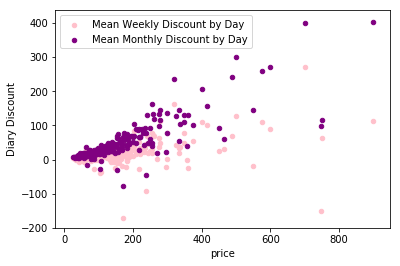

In [144]:
ax = discounts.plot(kind='scatter', x='Price', y='mean_weekly_disc_by_day', color='Pink', label ='Mean Weekly Discount by Day')
discounts.plot(kind='scatter', x='price', y='Diary Discount',  color='Purple', label ='Mean Monthly Discount by Day', 
               ax=ax)

**Availability:**

In [201]:
listings['guests_included'].value_counts(dropna=False)

1     2275
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
9        2
10       2
15       1
13       1
11       1
12       1
Name: guests_included, dtype: int64

In [203]:
listings['extra_people'].value_counts(dropna=False).head()

$0.00     2048
$10.00     355
$25.00     322
$15.00     309
$20.00     308
Name: extra_people, dtype: int64

In [206]:
listings['minimum_nights'].value_counts(dropna=False).head()

1    1610
2    1423
3     480
4     122
5      67
Name: minimum_nights, dtype: int64

In [207]:
listings['maximum_nights'].value_counts(dropna=False).head()

1125    2453
30       183
365      148
14       123
7        108
Name: maximum_nights, dtype: int64

In [208]:
listings['has_availability'].value_counts(dropna=False)

t    3818
Name: has_availability, dtype: int64

In [210]:
listings['availability_30'].value_counts(dropna=False).head()

30    981
0     883
29    141
25    110
27    109
Name: availability_30, dtype: int64

In [211]:
listings['availability_60'].value_counts(dropna=False).head()

60    925
0     677
59    122
57     92
55     88
Name: availability_60, dtype: int64

In [212]:
listings['availability_90'].value_counts(dropna=False).head()

90    826
0     571
89    160
85     79
88     77
Name: availability_90, dtype: int64

In [213]:
listings['availability_365'].value_counts(dropna=False).head()

365    678
0       95
364     91
89      70
361     53
Name: availability_365, dtype: int64

**Policies:**

In [1]:
listings['requires_license'].value_counts(dropna=False).head()

NameError: name 'listings' is not defined

In [216]:
listings['jurisdiction_names'].value_counts(dropna=False).head()

WASHINGTON    3818
Name: jurisdiction_names, dtype: int64

In [217]:
listings['instant_bookable'].value_counts(dropna=False).head()

f    3227
t     591
Name: instant_bookable, dtype: int64

In [218]:
listings['cancellation_policy'].value_counts(dropna=False).head()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64